[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/eyaler/workshop/blob/master/nn_2_mnist.ipynb)

# 3. How to train and test your network (CIFAR)

In [1]:
%tensorflow_version 1.x
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from keras import Input, Model
from keras.layers import Dense, Dropout
from keras.datasets import mnist, cifar10
from keras.utils import to_categorical
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

Using TensorFlow backend.


In [0]:
# set random seeds for more reproducible results
from numpy.random import seed
seed(42)
from tensorflow import set_random_seed
set_random_seed(43)

In [3]:
# load dataset
#(raw_x_train, raw_y_train), (raw_x_test, raw_y_test) = mnist.load_data()
(raw_x_train, raw_y_train), (raw_x_test, raw_y_test) = cifar10.load_data()
print(raw_x_train.shape, raw_y_train.shape)
if len(raw_x_train.shape)==4:
    raw_x_train = np.mean(raw_x_train, axis=-1)
    raw_x_test = np.mean(raw_x_test, axis=-1)
train_size = len(raw_y_train)
test_size = len(raw_y_test)
xdim = raw_x_train.shape[1]
ydim = raw_x_train.shape[2]
print(raw_x_train.dtype, raw_y_train.dtype)

170500096/170498071 [==============================] - 6s 0us/step
(50000, 32, 32, 3) (50000, 1)
float64 uint8


[[ 61.33333333  44.66666667  47.         ... 132.66666667 126.33333333
  125.        ]
 [ 18.66666667   0.           8.66666667 ...  88.66666667  84.
   88.66666667]
 [ 23.33333333   7.66666667  28.         ...  84.          84.66666667
   74.66666667]
 ...
 [158.         129.33333333 128.33333333 ... 121.          31.33333333
   35.66666667]
 [138.33333333 112.66666667 120.         ... 142.          64.33333333
   56.66666667]
 [145.66666667 130.33333333 136.         ... 180.         117.66666667
   95.66666667]]
[6]


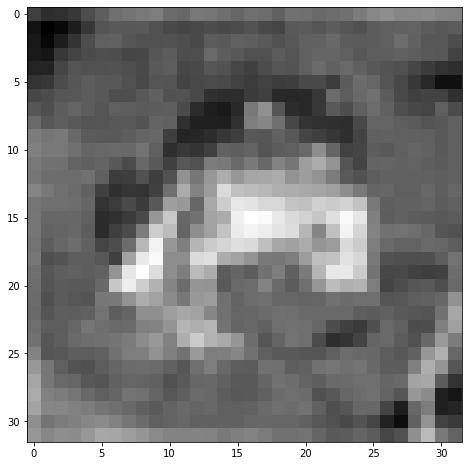

In [4]:
print(raw_x_train[0])
print(raw_y_train[0])
plt.imshow(raw_x_train[0], cmap='gray')

In [5]:
print(np.min(raw_x_train), np.max(raw_x_train), np.median(raw_x_train))
print(np.unique(raw_y_train, return_counts=True))
print(np.unique(raw_y_test, return_counts=True))

0.0 255.0 116.33333333333333
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))


In [0]:
n_classes = len(np.unique(raw_y_test))
x_train, y_train = shuffle(raw_x_train, raw_y_train, random_state=44)
x_train = x_train.reshape((train_size, -1))/255
x_test = raw_x_test.reshape((test_size, -1))/255
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(raw_y_test, n_classes)

In [0]:
dropout_prob = 0.5

def get_model():
    inputs = Input(shape=(xdim*ydim,))
    f = Dense(1024, activation='relu')(inputs)
    f = Dropout(dropout_prob)(f)
    f = Dense(1024, activation='relu')(f)
    f = Dropout(dropout_prob)(f)
    f = Dense(256, activation='relu')(f)
    f = Dropout(dropout_prob)(f)
    outputs = Dense(n_classes, activation='softmax')(f)
    return Model(inputs=inputs, outputs=outputs)

In [8]:
model = get_model()
print(model.summary())
model.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x=x_train, y=y_train, batch_size=64, epochs=300, validation_split=0.2)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               262400    
______

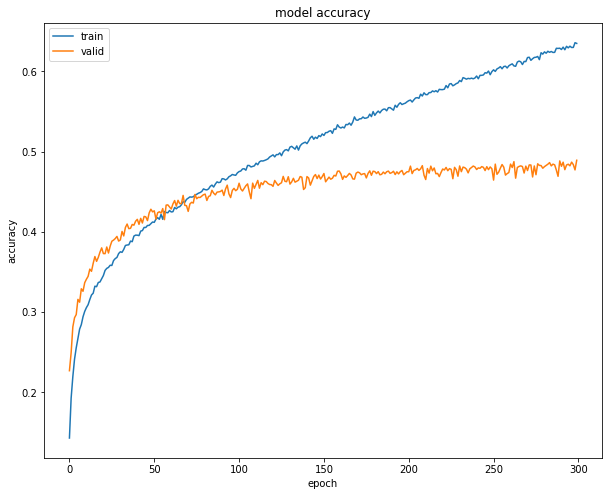

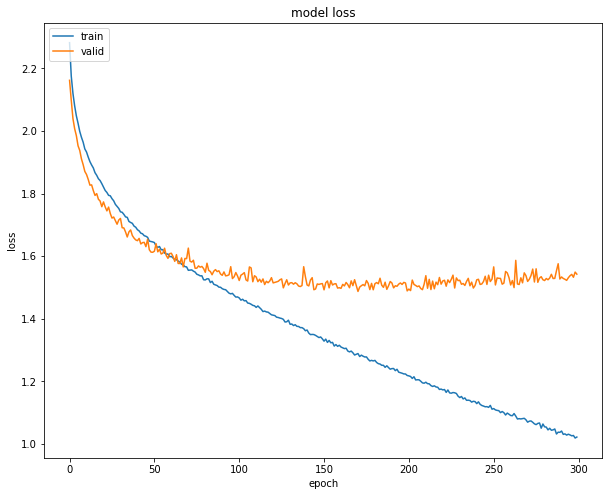

In [9]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [10]:
from sklearn.metrics import confusion_matrix
loss, acc = model.evaluate(x=x_test, y=y_test)
print(loss, acc)
targets = np.argmax(y_test, axis=-1)
probabilities = model.predict(x=x_test)
predictions = np.argmax(probabilities, axis=-1)
cm = confusion_matrix(y_true=targets, y_pred=predictions)
print(cm)

10000/10000 [==============================] - 0s 43us/step
1.5175313871383667 0.4872
[[426  40 119  17 121  11  40  21 169  36]
 [ 18 617   9  33  38   8  60  17  78 122]
 [ 40  17 431  73 204  72  86  29  29  19]
 [ 23  25  93 268 165 167 156  50  19  34]
 [ 29  12 164  43 508  44  96  64  35   5]
 [ 16  10 118 157 146 387  77  63  13  13]
 [ 12  37  89  58 133  32 585  18  18  18]
 [ 15  20  44  64 164  78  31 535  21  28]
 [ 80  84  27  30  68  19  32  18 600  42]
 [ 21 193  24  48  41  13  45  35  65 515]]


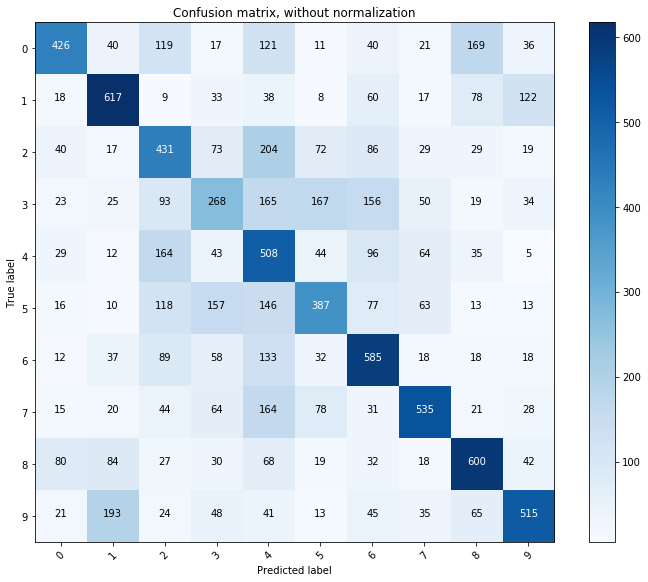

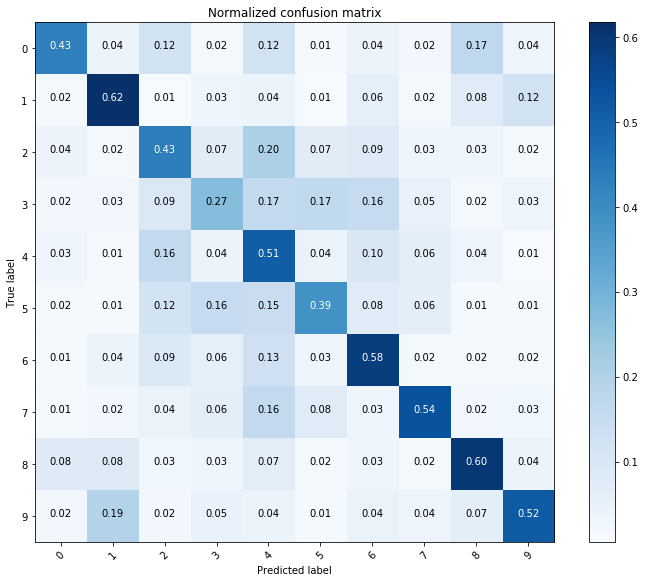

In [11]:
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title = 'Normalized confusion matrix'
    else:
        title = 'Confusion matrix, without normalization'

    plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    np.set_printoptions(precision=2)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

classes = np.arange(n_classes)
plot_confusion_matrix(cm, classes=classes)
plot_confusion_matrix(cm, classes=classes, normalize=True)

In [12]:
from sklearn.metrics import classification_report
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
report = classification_report(y_true=targets, y_pred=predictions, labels=classes, target_names=class_names)
print(report)

              precision    recall  f1-score   support

    airplane       0.63      0.43      0.51      1000
  automobile       0.58      0.62      0.60      1000
        bird       0.39      0.43      0.41      1000
         cat       0.34      0.27      0.30      1000
        deer       0.32      0.51      0.39      1000
         dog       0.47      0.39      0.42      1000
        frog       0.48      0.58      0.53      1000
       horse       0.63      0.54      0.58      1000
        ship       0.57      0.60      0.59      1000
       truck       0.62      0.52      0.56      1000

    accuracy                           0.49     10000
   macro avg       0.50      0.49      0.49     10000
weighted avg       0.50      0.49      0.49     10000



loss	index	true		predicted	probability
1.5237	6688	automobile		horse		0.9860
1.5002	2323	ship		automobile		0.9991
1.3350	9930	ship		dog		0.5597
1.2493	2895	horse		dog		0.9752
1.1919	4748	airplane		automobile		0.9911
1.1891	9529	truck		dog		0.6168
1.1665	3438	truck		automobile		0.9971
1.1594	2136	airplane		truck		0.9881
1.1581	2532	airplane		automobile		0.9083
1.1557	3489	cat		automobile		0.7363


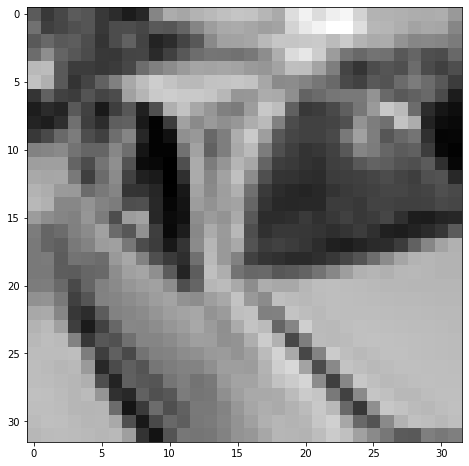

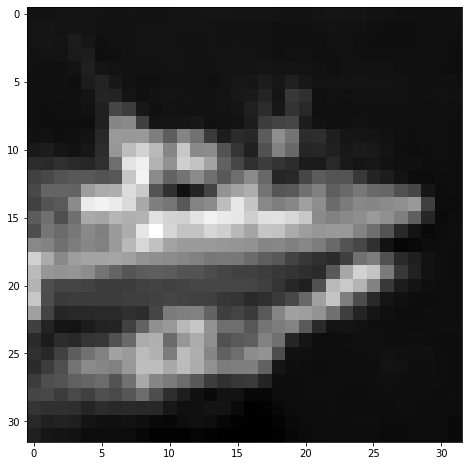

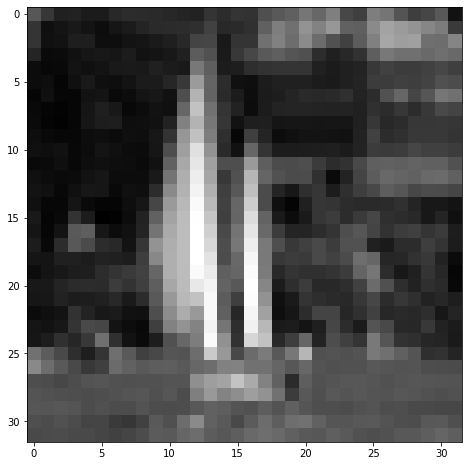

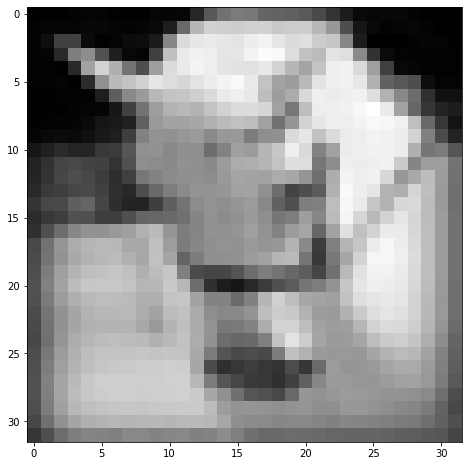

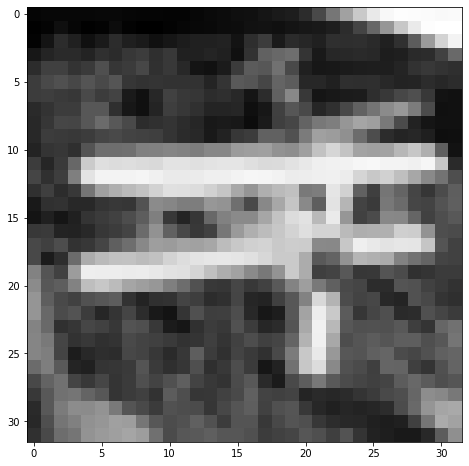

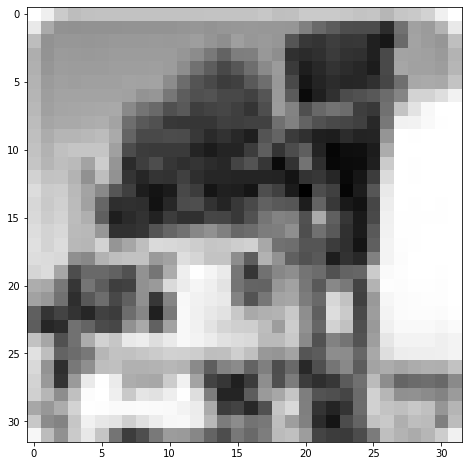

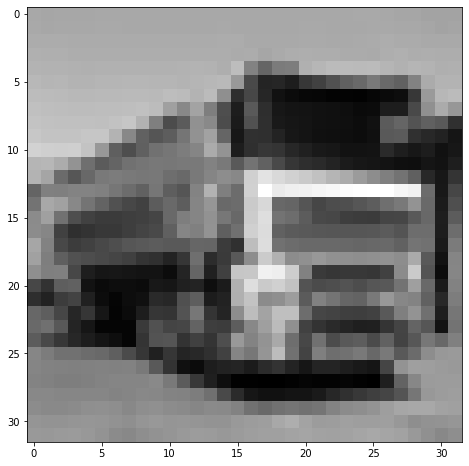

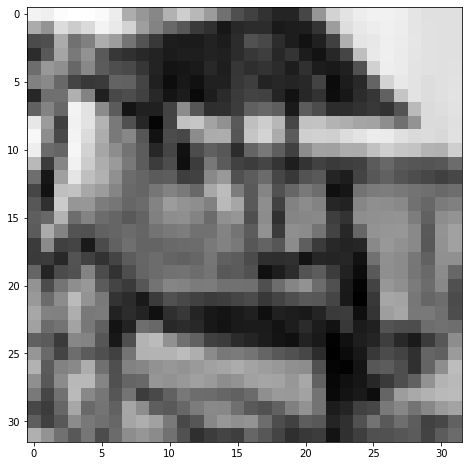

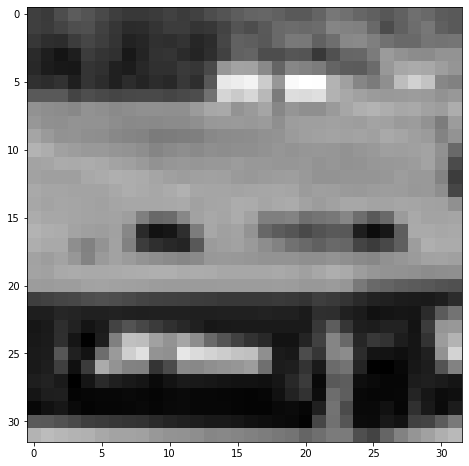

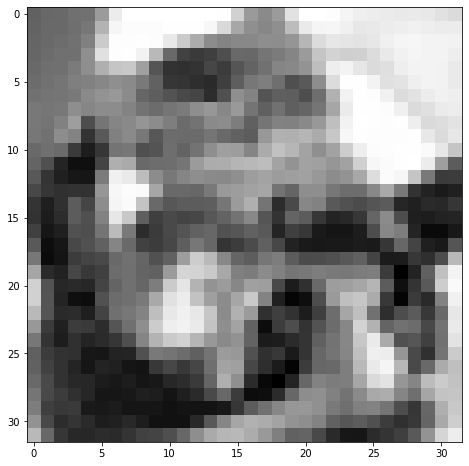

In [13]:
# top errors
from sklearn.metrics import log_loss
max_probs = np.max(probabilities, axis=-1)
losses = [log_loss(y_true=y, y_pred=prob, eps=1e-7) for y,prob in zip(y_test,probabilities)]
print('loss\tindex\ttrue\t\tpredicted\tprobability')
top_errors = sorted(list(zip(losses, np.arange(test_size), [class_names[t] for t in targets], [class_names[p] for p in predictions], max_probs)), reverse=True)[:10]
for error in top_errors:
    print('%.04f\t%d\t%s\t\t%s\t\t%.04f'%error)
    plt.figure()
    plt.imshow(x_test[error[1]].reshape((xdim, ydim)), cmap='gray')